In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

### Loading the Original Image

shape of the image: (512, 512)


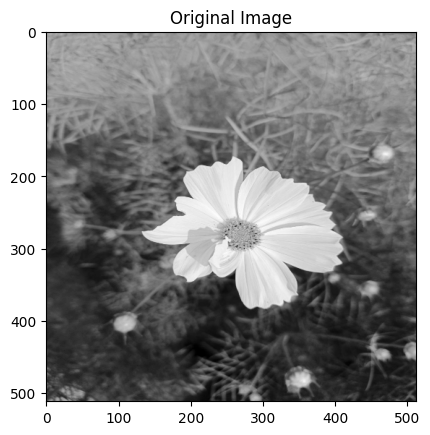

min pixel intensity: 0
max pixel intensity: 250


In [4]:
#original_image = cv2.imread('./images/flower.jpg',cv2.IMREAD_GRAYSCALE)
original_image = cv2.imread('./images/flower.jpg',0)
original_image = cv2.resize(original_image,(512,512))
print(f'shape of the image: {original_image.shape}')
plt.imshow(original_image,cmap='gray')
plt.title('Original Image')
plt.show()

img_arr = np.array(original_image)
print(f"min pixel intensity: {np.min(img_arr)}")
print(f"max pixel intensity: {np.max(img_arr)}")

### FFT(Fast Fourier Transform).
Spatial Domain -> Frequency Domain.

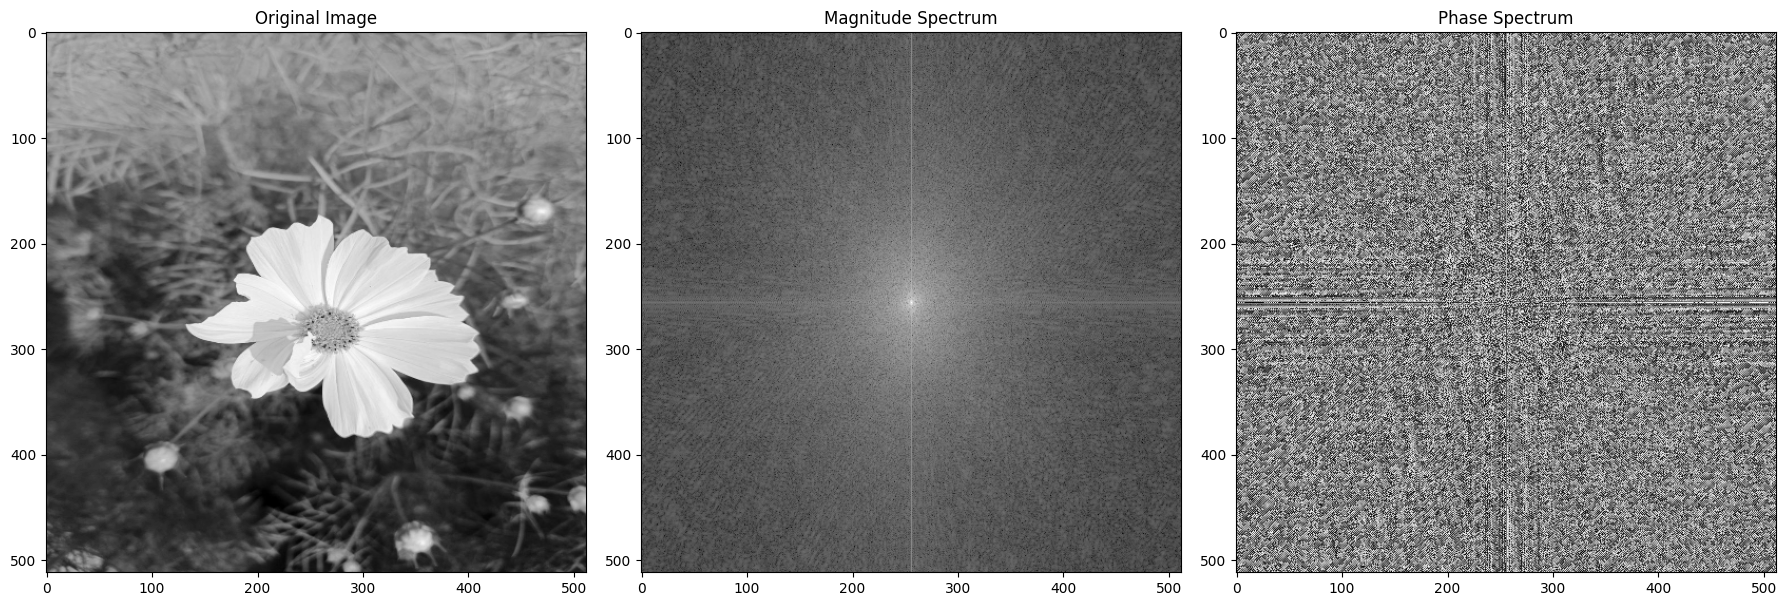

In [5]:
#compute the fft of an image
fft_result = np.fft.fft2(original_image) #perform 2D FFT
fft_shift = np.fft.fftshift(fft_result) #shift zero frequency to the center

#compute the magnitude spectrum
magnitude = np.abs(fft_shift)
magnitude_spectrum = np.log10(1 + magnitude)

#compute the phase spectrum
phase_spectrum = np.angle(fft_shift)


# Plot the results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Phase Spectrum")
plt.imshow(phase_spectrum, cmap='gray')

plt.tight_layout()
plt.show()


### IFFT(Inverse Fast Fourier Transform).
Frequency Domain -> Spatial Domain.

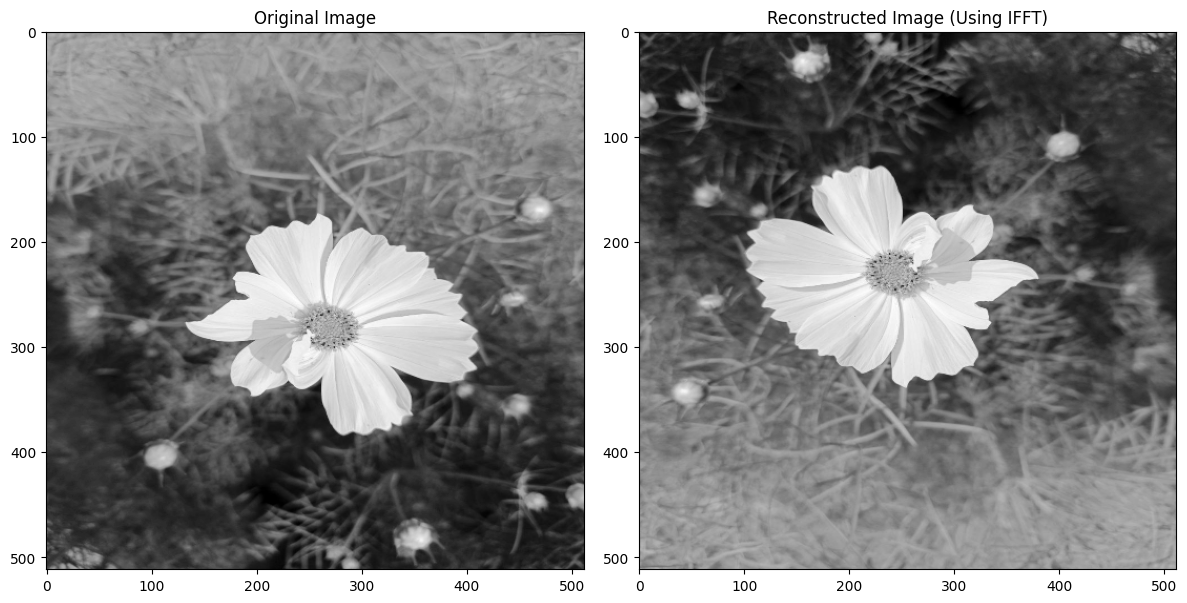

In [7]:
# Compute the Inverse FFT (IFFT) to reconstruct the image
ifft_shift = np.fft.ifftshift(fft_shift) # Inverse shift to bring the zero frequency back
reconstructed_image = np.fft.fft2(ifft_shift) #IFFT
reconstructed_image = np.abs(reconstructed_image) # Get real part and ensure non-negative

#Plot the original and reconstructed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image (Using IFFT)")
plt.imshow(reconstructed_image, cmap='gray')

plt.tight_layout()
plt.show()


In [6]:
#Histogram of the original and reconstructed image 
#histogram of the frequency domain image 